<a href="https://colab.research.google.com/github/yogeshgujjar/hero-no-1/blob/main/TitanicSurvivalRate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('/content/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


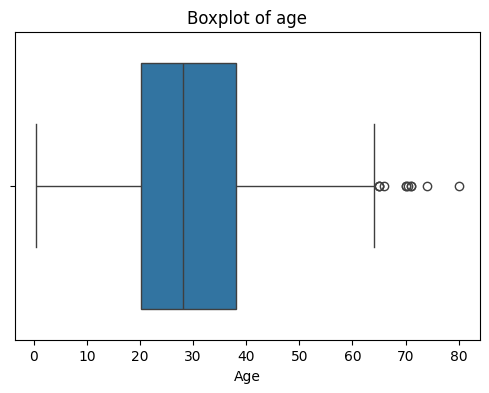

In [30]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Age'])
plt.title("Boxplot of age")
plt.show()


In [32]:
# Step 1: Q1 and Q3
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)

# Step 2: IQR
IQR = Q3 - Q1

# Step 3: Limits
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print("Lower Limit:", lower_limit)
print("Upper Limit:", upper_limit)

Lower Limit: -6.6875
Upper Limit: 64.8125


In [29]:
outliers = df[(df['Fare'] < lower_limit) | (df['Age'] > upper_limit)]
print("Number of Outliers in Age:", outliers.shape[0])
outliers['Age'].head()

Number of Outliers in Age: 11


,Age
33,66.0
54,65.0
96,71.0
116,70.5
280,65.0


In [27]:
outliers = df[(df['Age'] < lower_limit) | (df['Fare'] > upper_limit)]
print("Number of Outliers in Fare:", outliers.shape[0])
outliers['Fare'].head()

Number of Outliers in Fare: 5


,Fare
3,53.1
137,53.1
724,53.1
748,53.1
809,53.1


In [20]:
# Keep only non-outliers
df_no_outliers = df[(df['Fare'] >= lower_limit) & (df['Fare'] <= upper_limit)]

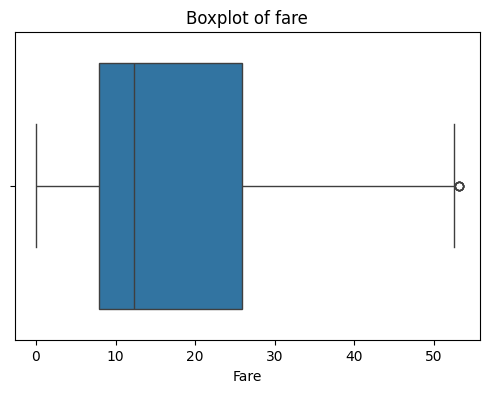

In [21]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df_no_outliers['Fare'])
plt.title("Boxplot of fare")
plt.show()

In [23]:
# Step 1: Q1 and Q3
Q1 = df_no_outliers['Fare'].quantile(0.25)
Q3 = df_no_outliers['Fare'].quantile(0.75)

# Step 2: IQR
IQR = Q3 - Q1

# Step 3: Limits
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print("Lower Limit:", lower_limit)
print("Upper Limit:", upper_limit)

Lower Limit: -19.021437499999998
Upper Limit: 52.7578625


In [24]:
outliers = df[df['Fare'] > 52.75]
print("Number of high Fare outliers:", outliers.shape[0])
print(outliers[['PassengerId', 'Fare', 'Pclass', 'Survived']].head())


Number of high Fare outliers: 146
    PassengerId      Fare  Pclass  Survived
1             2   71.2833       1         1
3             4   53.1000       1         1
27           28  263.0000       1         0
31           32  146.5208       1         1
34           35   82.1708       1         0


In [25]:
df[df['Fare'] > 52.75]['Survived'].value_counts(normalize=True)

,proportion
Survived,
1,0.691781
0,0.308219


In [33]:
lower_limit = -6.6875
upper_limit =  64.8125

In [35]:
age_outliers = df[(df['Age'] < lower_limit) | (df['Age'] > upper_limit)]
age_outliers[['PassengerId', 'Age', 'Pclass', 'Survived']]


,PassengerId,Age,Pclass,Survived
33,34,66.0,2,0
54,55,65.0,1,0
96,97,71.0,1,0
116,117,70.5,3,0
280,281,65.0,3,0
456,457,65.0,1,0
493,494,71.0,1,0
630,631,80.0,1,1
672,673,70.0,2,0
745,746,70.0,1,0


In [37]:
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


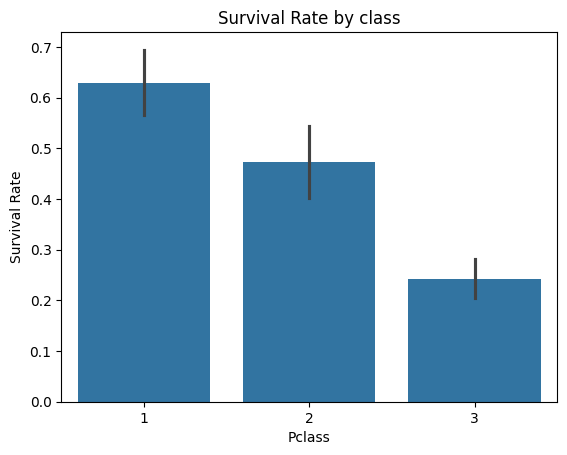

In [40]:
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title("Survival Rate by class")
plt.ylabel("Survival Rate")
plt.show()

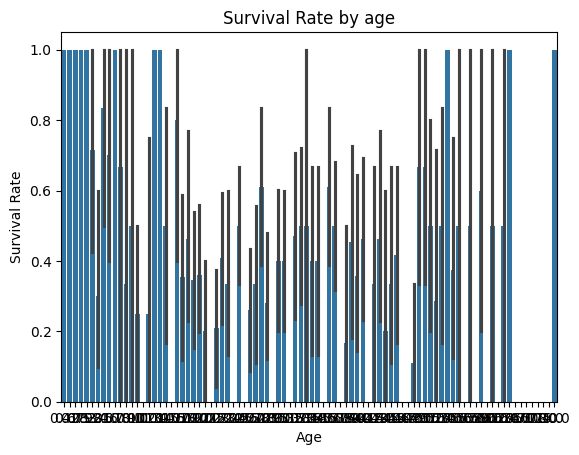

In [41]:
sns.barplot(x='Age', y='Survived', data=df)
plt.title("Survival Rate by age")
plt.ylabel("Survival Rate")
plt.show()

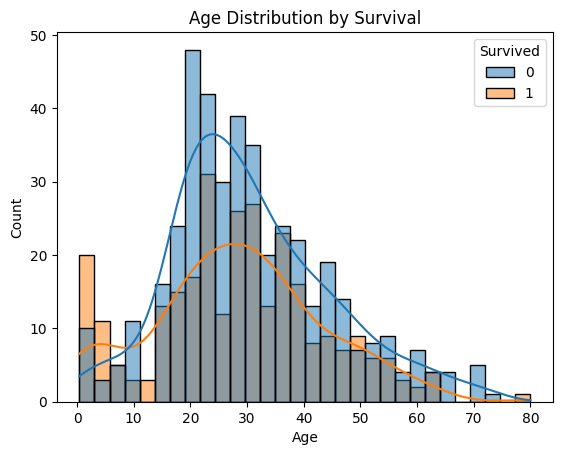

In [42]:
sns.histplot(data=df, x='Age', hue='Survived', bins=30, kde=True)
plt.title("Age Distribution by Survival")
plt.show()


In [43]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1


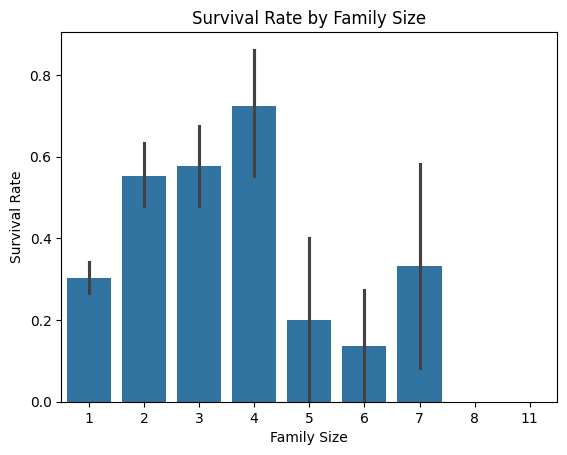

In [44]:
sns.barplot(x='FamilySize', y='Survived', data=df)
plt.title("Survival Rate by Family Size")
plt.ylabel("Survival Rate")
plt.xlabel("Family Size")
plt.show()

In [46]:
df['FareGroup'] = pd.cut(
    df['Fare'],
    bins=[0, 7.91, 14.454, 31, 1000],
    labels=['Low', 'Mid', 'High', 'Very High']
)

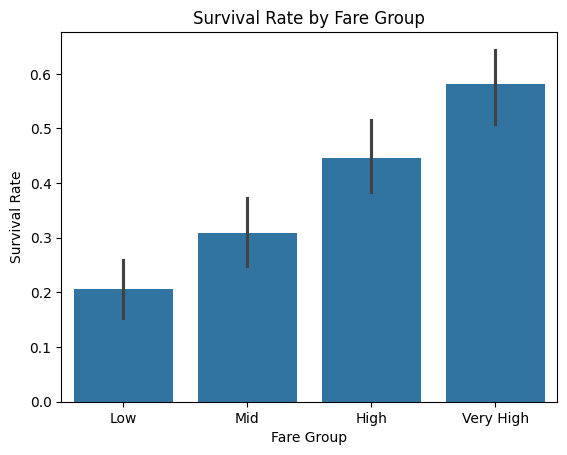

In [47]:
sns.barplot(x='FareGroup', y='Survived', data=df)
plt.title("Survival Rate by Fare Group")
plt.ylabel("Survival Rate")
plt.xlabel("Fare Group")
plt.show()

In [48]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.904602
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,1.613459
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,11.000000


In [49]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [50]:
# Fill missing Embarked with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

<ipython-input-50-2427957840>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [51]:
df['Age'] = df.groupby('Title')['Age'].transform(lambda x: x.fillna(x.median()))

In [52]:
df['Deck'] = df['Cabin'].apply(lambda x: x[0] if pd.notna(x) else 'U')

In [53]:
df['Fare'].fillna(df['Fare'].median(), inplace=True)


<ipython-input-53-146823877>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Fare'].fillna(df['Fare'].median(), inplace=True)


In [63]:
df.drop('FareGroup', axis=1, inplace=True)

In [62]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [66]:
df['FareGroup'] = pd.cut(
    df['Fare'],
    bins=[0, 7.91, 14.454, 31, 1000],
    labels=['Low', 'Mid', 'High', 'Very High'],
    include_lowest=True  # 👈 This is important!
)


In [69]:
df['AgeGroup'] = pd.cut(
    df['Age'],
    bins=[0, 10, 20, 30, 40, 60, 80],
    labels=['0-10', '11-20', '21-30', '31-40', '41-60', '61-80'],
    include_lowest=True
)

In [70]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [71]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Binary: Male/Female
df['Sex'] = le.fit_transform(df['Sex'])

# Ordered: FareGroup, AgeGroup
df['FareGroup'] = le.fit_transform(df['FareGroup'])
df['AgeGroup'] = le.fit_transform(df['AgeGroup'])

In [72]:
df = pd.get_dummies(df, columns=['Embarked', 'Title', 'Deck'], drop_first=True)

In [73]:
df.dtypes.value_counts()

,count
bool,26
int64,9
object,3
float64,2


In [74]:
df.shape

(891, 40)

In [75]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Age', 'Fare', 'FamilySize']] = scaler.fit_transform(df[['Age', 'Fare', 'FamilySize']])

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 40 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     891 non-null    int64  
 1   Survived        891 non-null    int64  
 2   Pclass          891 non-null    int64  
 3   Name            891 non-null    object 
 4   Sex             891 non-null    int64  
 5   Age             891 non-null    float64
 6   SibSp           891 non-null    int64  
 7   Parch           891 non-null    int64  
 8   Ticket          891 non-null    object 
 9   Fare            891 non-null    float64
 10  Cabin           204 non-null    object 
 11  FamilySize      891 non-null    float64
 12  FareGroup       891 non-null    int64  
 13  AgeGroup        891 non-null    int64  
 14  Embarked_Q      891 non-null    bool   
 15  Embarked_S      891 non-null    bool   
 16  Title_Col       891 non-null    bool   
 17  Title_Countess  891 non-null    boo

In [77]:
X = df.drop(['Survived', 'Name', 'Ticket', 'PassengerId', 'Cabin'], axis=1)
y = df['Survived']

In [80]:
X.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize',
       'FareGroup', 'AgeGroup', 'Embarked_Q', 'Embarked_S', 'Title_Col',
       'Title_Countess', 'Title_Don', 'Title_Dr', 'Title_Jonkheer',
       'Title_Lady', 'Title_Major', 'Title_Master', 'Title_Miss', 'Title_Mlle',
       'Title_Mme', 'Title_Mr', 'Title_Mrs', 'Title_Ms', 'Title_Rev',
       'Title_Sir', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G',
       'Deck_T', 'Deck_U'],
      dtype='object')

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8156424581005587
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       105
           1       0.77      0.80      0.78        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [86]:
!pip install streamlit
!pip install pyngrok
!pip install joblib

In [89]:
import joblib

# Save your trained model and scaler
joblib.dump(model, "titanic_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [90]:
%%writefile app.py
import streamlit as st
import joblib
import numpy as np

# Load model and scaler
model = joblib.load('titanic_model.pkl')
scaler = joblib.load('scaler.pkl')

st.title("🚢 Titanic Survival Predictor")

pclass = st.selectbox("Passenger Class", [1, 2, 3])
sex = st.radio("Sex", ['male', 'female'])
age = st.slider("Age", 0, 80, 25)
fare = st.number_input("Fare", min_value=0.0, max_value=600.0, value=32.0)
sibsp = st.slider("Siblings/Spouses", 0, 8, 0)
parch = st.slider("Parents/Children", 0, 6, 0)
embarked_Q = st.checkbox("Embarked at Queenstown?")
embarked_S = st.checkbox("Embarked at Southampton?")
title_Mr = st.checkbox("Title: Mr?")
title_Miss = st.checkbox("Title: Miss?")
deck_U = st.checkbox("Deck: U (Unknown)?")

# Derived features
family_size = sibsp + parch + 1
age_scaled, fare_scaled, family_scaled = scaler.transform([[age, fare, family_size]])[0]
sex_encoded = 1 if sex == 'male' else 0

features = np.array([[
    pclass,
    sex_encoded,
    age_scaled,
    fare_scaled,
    family_scaled,
    int(embarked_Q),
    int(embarked_S),
    int(title_Mr),
    int(title_Miss),
    int(deck_U)
]])

if st.button("Predict"):
    prediction = model.predict(features)[0]
    st.success("Survived 🎉" if prediction == 1 else "Did not survive 💀")


Overwriting app.py


In [93]:
!ngrok config add-authtoken 2xvkDw4KA1r5DD19X6PXULAf0qS_2Y89JiCCTHCnPdtm64rzf

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [95]:
from pyngrok import ngrok

# Kill any previous process
!pkill streamlit

# Run streamlit app
!streamlit run app.py &>/content/log.txt &

# Connect public URL using updated syntax
public_url = ngrok.connect("http://localhost:8501")
print("Your app is live at:", public_url)


Your app is live at: NgrokTunnel: "https://88f1-35-221-235-212.ngrok-free.app" -> "http://localhost:8501"
